<b><span style= "font-size:20px"> Utf-8 <br>
<span style= "font-size:15px">
코드 내부에 한글을 사용 가능하게 해주는 부분<br>
유니코드를 위한 가변 길이 문자 인코딩 방식 중 하나로, 켄 톰프슨과 롭 파이크가 만들었다 

In [6]:
#-*- coding: utf-8 -*-

<b><span style= "font-size:20px"> MNIST <br>
<span style= "font-size:15px">
MNIST Database: 수만 개의 손글씨 숫자 이미지가 숫자와 대응되어 모아져있다<br>
10자리의 28x28 그레이스케일 이미지 60,000개의 데이터셋과 10,000개의 이미지 테스트셋<br>
전처리 및 포맷에 최소한의 노력을 기울이면서 실제 데이터에 대한 학습 기법과 패턴 인식 방법을 시도하려는 사람들에게 좋은 데이터베이스

In [7]:
#from keras.datasets import mnist
from tensorflow.keras.datasets import mnist

<b><span style= "font-size:20px"> to_categorical <br>
<span style= "font-size:15px">
클래스 벡터(정수)를 이진 클래스 행렬로 변환한다

In [8]:
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

<b><span style= "font-size:20px"> Sequential <br>
<span style= "font-size:15px">
tf.keras.Model로 선형 레이어 스택을 만든다

In [9]:
#from keras.models import Sequential, load_model
from tensorflow.keras.models import Sequential

<b><span style= "font-size:20px"> Dense <br>
<span style= "font-size:15px">
촘촘하게 연결된 NN 레이어

In [10]:
#from keras.layers.core import Dense
from tensorflow.keras.layers import Dense

<b><span style= "font-size:20px"> ModelCheckpoint, EarlyStopping <br>
<span style= "font-size:15px">
콜백은 model training 및 inference lifecycle의 다양한 단계에 연결하기 위해 fit, evaluate, predict와 같은 keras methods에 전달한다<br>
Keras model이나 model weights 저장하기 위해 호출한다 <br>
Monitored metric이 개선되지 않으면 트레이닝을 멈춘다

In [11]:
#from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

<b><span style= "font-size:20px"> pyplot, numpy, os, tensorflow <br>
<span style= "font-size:15px">
pyplot: 각각의 함수를 사용해서 간편하게 그래프 및 차트의 형태로 데이터 시각화<br>
numpy: 다차원 배열 객체, 다양한 파생 객체(마스크 배열 및 행렬 등) 및 배열의 빠른 연산<br>
os: 운영 체제와 상호 작용하기 위한 기능<br>
tensorflow: 다양한 작업에 대해 데이터 흐름 프로그래밍, 인공 신경망같은 기계 학습 응용프로그램 및 딥러닝에도 사용

In [12]:
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

<b><span style= "font-size:20px"> seed 값 설정 <br>
<span style= "font-size:15px">
시드값을 설정해주는 과정<br>
특정 시작 숫자를 수동으로 설정하여 발생되는 난수를 알고리즘에 따라 직접 예측<br>

In [13]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# <span style= "color:orange"> 본격적인 코드

<b><span style= "font-size:20px"> MNIST 데이터 불러오기 <br>
<span style= "font-size:15px">
>28x28(784) 뉴론을 가진 그레이스케일 input 이미지를 불러온다 <br>
각 뉴론은 픽셀의 그레이스케일 값에 해당하는 Activation이라는 숫자를 가진다 <br>
학습에 사용될 Train 데이터와 테스트에 사용될 test 데이터로 나눈다 <br>
0(검은색)과 255(흰색) 사이의 숫자를 가지고 있기 때문에 255로 나누어 주어서 0과 1 사이의 숫자로 바꾼다 <br>
data type은 float32를 사용하여 실수형으로 바꾸고, 32bits를 사용하여 빠르게 계산한다

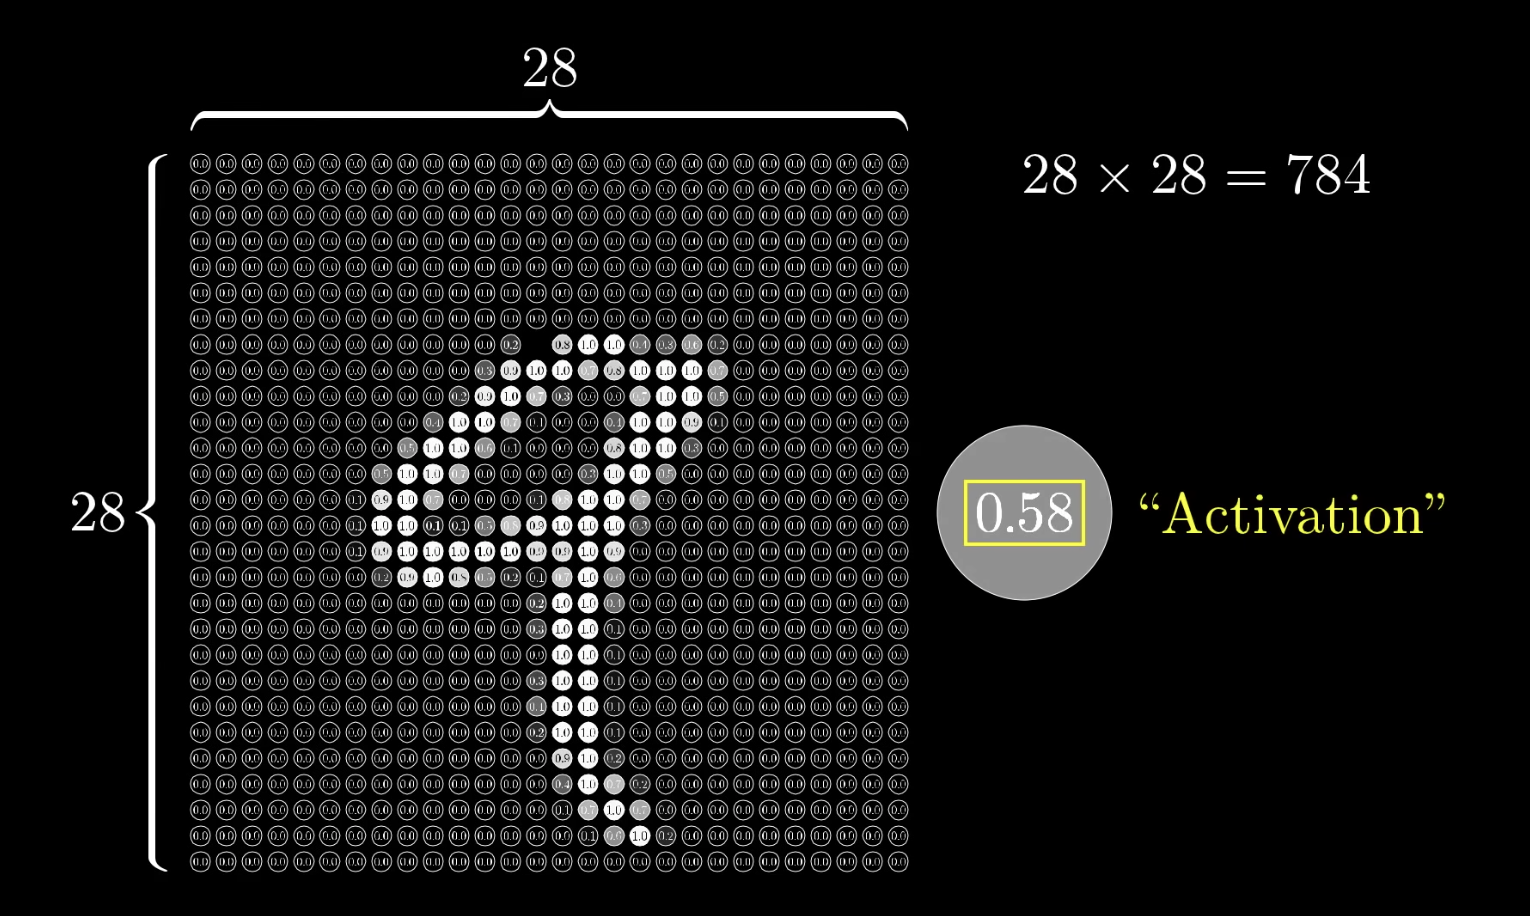

In [14]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


<b><span style= "font-size:20px"> 레이어 구축하기 <br>
<span style= "font-size:15px">
> Sequential()로 순차적인 모델을 만들고 parameter를 설정한다 <br>
여기서는 Hidden layer 2개는 16개의 뉴런으로 구성되고 activation function은 reLU로 사용한다 <br> 
실제로는 더 많이 사용되기도 하며 여기서는 쉽게 알아보기 위해 적은 뉴런으로 진행한다 <br>
Output layer는 0과 9사이의 숫자이기 때문에 10개의 뉴런으로 구성하고 activation function은 softmax를 사용한다<br>
Last layer에서는 Hidden layer에서 영향을 받아서 가장 밝은 뉴런이 주어진 이미지가 보여주는 숫자라고 판단한다<br>
Weight는 가중치로 중요도를 나타낸다 <br>
Weights가 자동적으로 조절되어 output layer에서 하나로 설정되도록 트레이닝 하게 된다 <br>
고려해야 하는 부분의 weight 양수의 값으로 설정하고 더하고 주변 부위 밝기를 음수의 값인 weight가 된다 <br><br>
σ(w1a1 + w2a2 + … + wnan + b0)<br>
Activations 값이 0과 1 사이가 되기 위해 Sigmoid function (logistic curve) 사용한다 <br>
의미있는 합을 도출하기 위해 특정 숫자(bias)를 설정하고, active 상태를 알기 위해 식에 더해준다 <br><br>
Hidden layer가 16 weights로 2번, Last layer 10 weights로 있을 때 <br>
784 x 16 + 16 x 16 + 16 x 10 weights<br>
16 + 16 + 10 biases<br>
13002 weights and biases를 가지게 된다<br>
하나의 레이어에서 Activations 값을 세로로 정렬해서 vector 값으로 쓰고, <br> weights와 biases를 행렬로 구성하여 표기하기도 한다

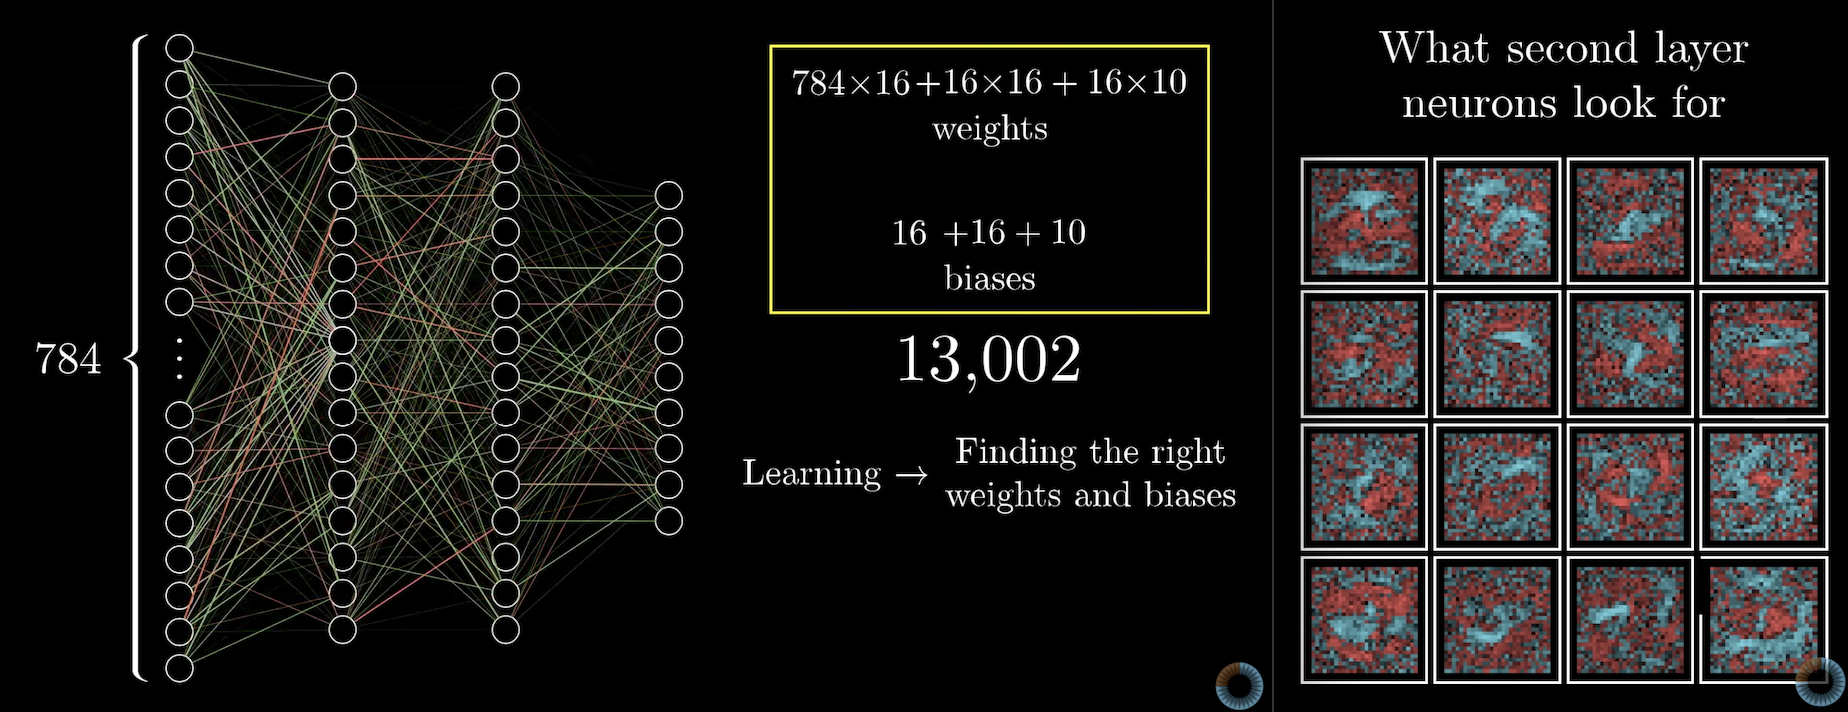

<b> <span style= "font-size:20px"> ReLU vs Sigmoid function <br>
<span style= "font-size:15px">
활성화 함수(Activation Function)로 계산한 값을 일괄적으로 변형시킨다<br>
Sigmoid, ReLU, Leaky ReLU, Maxout, ELU, tanh 등이 있다 <br>
> ReLU(rectified linear unit)는 시그모이드 함수의 대안으로 요즘 많이 쓰이며, 트레이닝 시키기 쉽다 <br>
여러 은닉층을 거치며 곱해지더라도 맨 처음 층까지 사라지지 않고 남아있을 수 있으며, 딥러닝의 발전 속도에 많은 기여를 했다<br>
특정 임계값을 초과하면 그대로 쓰이고 그 값을 넘지 못하면 inactive한 상태로 나타내어 간편하다 <br> <br>
Sigmoid는 큰 수를 0과 1 사이의 수로 줄이기 위함이다 <br>
배우는 속도가 느리기 때문에 주로 과거에 많이 사용되었다


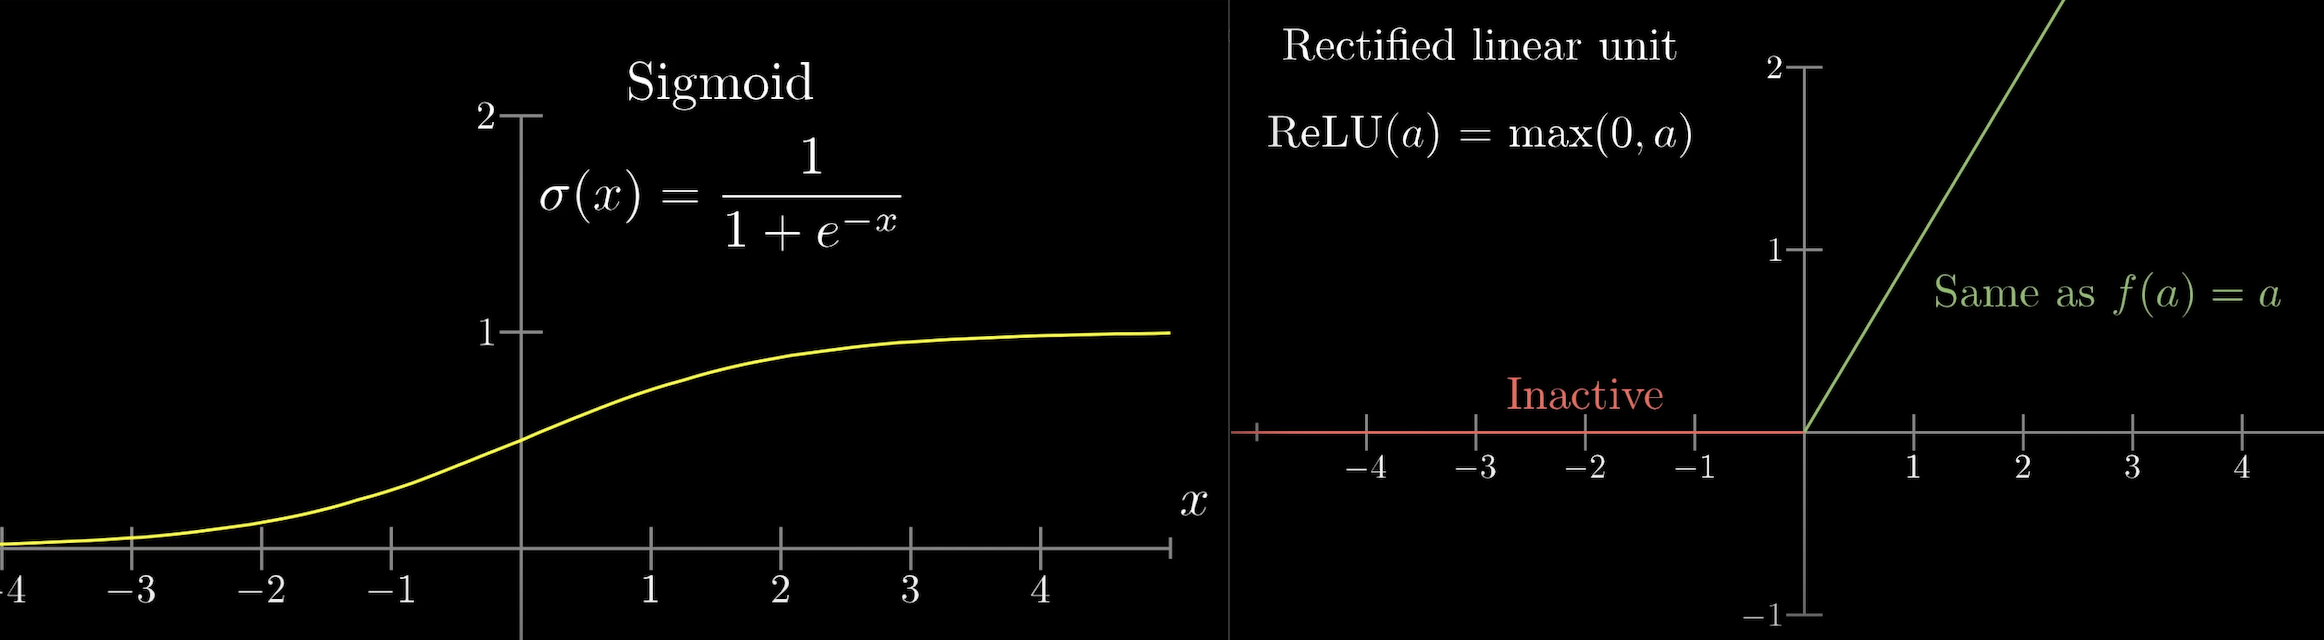

In [15]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

<b><span style= "font-size:20px"> 컴파일 <br>
<span style= "font-size:15px">
parameter를 설정해줘야 한다<br>
optimizer(최적화함수)로는 adam을 가장 많이 사용한다<br>
loss(오차함수)는 categorical_crossentropy를 쓰고, <br> metrics는 accuracy를 계속 모니터링 하기 위함이다

In [16]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


<b><span style= "font-size:20px"> fit 실행 <br>
<span style= "font-size:15px">
> model.fit<br>
모델을 트레이닝 시킨다
parameter<br>
epochs로 몇 번 반복할지 정한다 (iteration)
<br>batch_size는 input data를 한 번에 몇 개씩 다룰지 정한다<br>
샘플 200개를 모두 5번 실행하게끔 설정한다<br>
테스트셋으로 최정 모델의 성과를 측정하여 그 값을 출력한다
    
Neural network function<br>
input: 784 num<br>
output: 10 num<br>
parameters: 13002 weights/biases<br>

Cost function<br>
input: 13002 weights/biases<br>
output: 1 num (the cost)<br>
parameters: many training examples<br>

경사 하강법(Gradient descent)은  1차 근삿값 발견용 최적화 알고리즘이다<br>
함수의 기울기(경사)를 구하고 경사의 절댓값이 낮은 쪽으로 계속 이동시켜 극값에 이를 때까지 반복시킨다 <br>
오차 역전파 방법(Error Backpropagation)은 결과 값을 통해서 다시 역으로 input 방향으로 오차를 다시 보내며 가중치를 재업데이트 한다 <br>
실제값과 예측값의 차이를 비교하면서 weight가 조정되는 것이다<br>

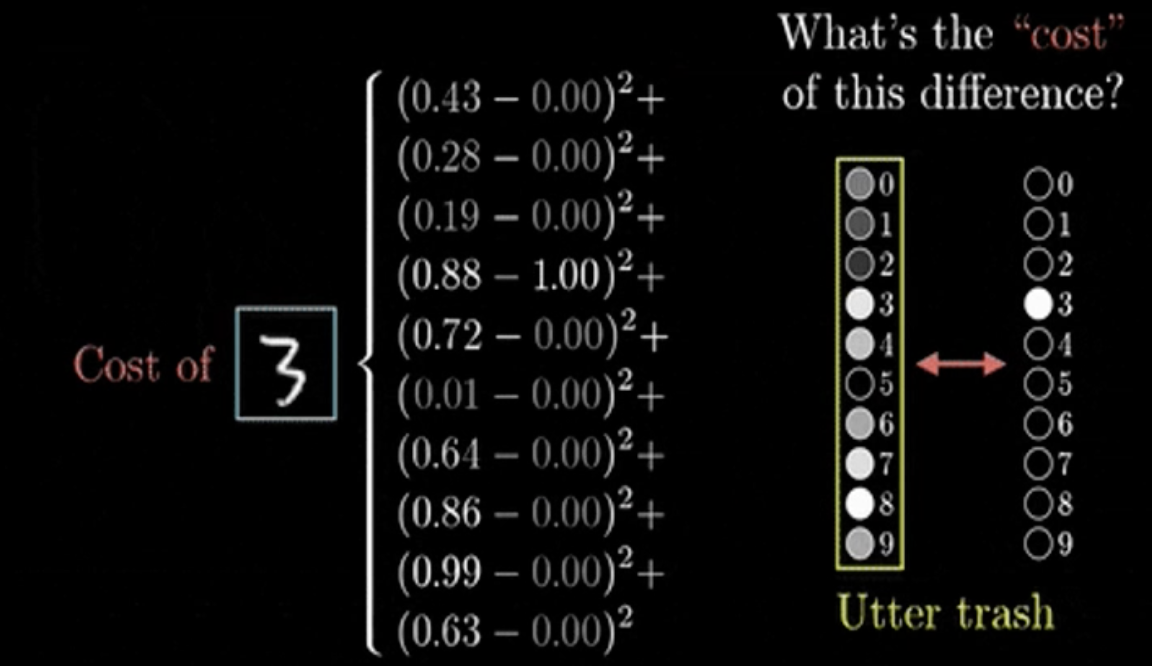

In [17]:
# 모델의 실행
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=200)

Epoch 1/5
300/300 [==============================] - 1s 1ms/step - loss: 0.8016 - accuracy: 0.7600 - val_loss: 0.3347 - val_accuracy: 0.9020
Epoch 2/5
300/300 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.9107 - val_loss: 0.2673 - val_accuracy: 0.9230
Epoch 3/5
300/300 [==============================] - 0s 1ms/step - loss: 0.2629 - accuracy: 0.9241 - val_loss: 0.2430 - val_accuracy: 0.9311
Epoch 4/5
300/300 [==============================] - 0s 1ms/step - loss: 0.2365 - accuracy: 0.9324 - val_loss: 0.2211 - val_accuracy: 0.9355
Epoch 5/5
300/300 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9382 - val_loss: 0.2113 - val_accuracy: 0.9376


<b><span style= "font-size:20px"> Evaluation 단계 <br>
<span style= "font-size:15px">
성능이 얼마나 좋은지 확인하는 단계<br> Test Accuracy를 확인할 수 있다<br>
모델의 loss value와 metrics values를 보여준다<br>

In [18]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 712us/step - loss: 0.2113 - accuracy: 0.9376

 Test Accuracy: 0.9376
